# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [2]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
# Read data
df = pd.read_csv('./train.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [41]:
# What is the shape of our data?
df.shape
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [42]:
# What variables are present in the dataset?
df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10901cf98>]], dtype=object)

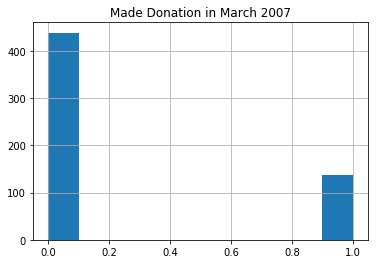

In [43]:
# What is the distribution of our outcome variable `Made Donation`?
df.hist('Made Donation in March 2007')

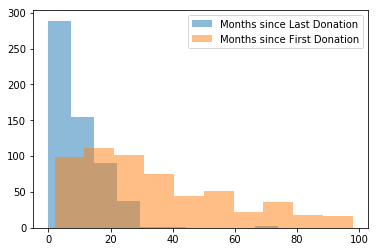

In [44]:
plt.hist(df["Months since Last Donation"], alpha=0.5, label='Months since Last Donation')
plt.hist(df["Months since First Donation"], alpha=0.5, label='Months since First Donation')
plt.legend(loc='upper right')
plt.show()

## Build a decision tree using all variables

In [45]:
# Create variables to hold features and outcomes separately
features = df.drop('Made Donation in March 2007', axis=1)
outcome = df["Made Donation in March 2007"]

In [46]:
# Split data into testing and training sets
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size=0.30)

In [47]:
# Create a classifier and fit your features to your outcome
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_outcome)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Assess Model Fit

In [48]:
# Generate a set of predictions for your test data
test_preds = clf.predict_proba(test_features)
test_preds

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,

In [14]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)
test_acc = (test_preds == test_outcome).sum()/len(test_outcome)
test_acc

0.75144508670520227

In [15]:
# By comparison, how well do we predict in our training data?
training_preds = clf.predict(train_features)
train_acc = (training_preds == train_outcome).sum()/len(train_outcome)
train_acc # Pefectly 

1.0

## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


In [17]:
import graphviz
tree.export_graphviz(clf, feature_names=features.columns, class_names=['San Fran', 'NYC'], out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

RuntimeError: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' path

## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [30]:
# Create a knn classifier
knn_clf = KNeighborsClassifier(n_neighbors = 4)

In [31]:
# Fit our classifier to our training data
knn_fit = knn_clf.fit(train_features, train_outcome)

In [32]:
# Predict on our test data and assess accuracy
knn_test_preds = knn_fit.predict(test_features)
test_acc = (knn_test_preds == test_outcome).sum()/len(test_outcome)
test_acc

0.75144508670520227